# Generating Sliding Window 

### Installing Packages

In [3]:
# Installing Package
!pip install --upgrade pip
!pip install opencv-python-headless==4.7.0.72

### Import Libraries

In [11]:
# Open CV
import cv2
# Data Visualization 
import matplotlib.pyplot as plt
import matplotlib.patches as patches
# Imagen Reading 
import os
# Math Managememnt
import numpy as np

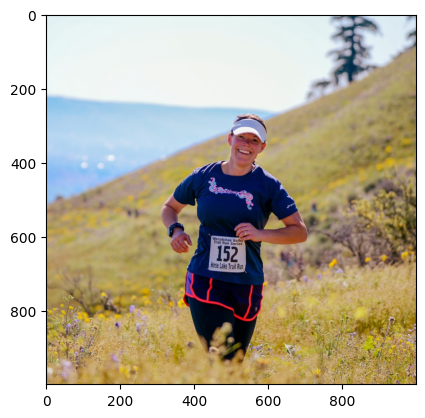

In [12]:
# Reading Picture
np_image = cv2.imread('/work/pexels-frank-cone-2330502-cropped.jpg')
# RGB Format Color Change
np_image = cv2.cvtColor(np_image, cv2.COLOR_BGR2RGB)
# Image Reshape
np_image = cv2.resize(np_image, dsize=(1000, 1000))
plt.imshow(np_image)
plt.show()

### Sliding Function Set-Up

In [13]:
# Defining 3 arguments
def sliding_window(image, step, ws):
  # Edge control on Y axe
  for y in range(0, image.shape[0]-ws[1]+1, step):
    # Edge control on X axe
    for x in range(0, image.shape[1]-ws[0]+1, step):
      #  Return Generator
      yield (x, y, image[y:y + ws[1], x:x +ws[0]])

In [14]:
# Let's storage & received back the sliding window
windows = sliding_window(np_image, 200, (200, 200))

In [15]:
# Let's set a storage folder 
os.makedirs('sliding_window')

FileExistsError: [Errno 17] File exists: 'sliding_window'

In [16]:
# A for-loop to perform 
for x, window in enumerate(windows):
  # FigSize Standard
  f, axarr = plt.subplots(1, 2, figsize=(12, 12))
  # Showing the Image
  axarr[0].imshow(np_image)
  # Patch Position Record
  rect = patches.Rectangle((window[0], window[1]), 200, 200, linewidth=2, edgecolor='g', facecolor='none')
  # Adding Patch
  axarr[0].add_patch(rect)
  # Adding Patch
  axarr[1].imshow(window[2])
  # Saving Image Generated
  f.savefig('sliding_window/'+str(x)+'.png', dpi=f.dpi)
  plt.show()

CellOutputSizeError: The block's output is too large.

### Generating a Sliding Windown Video

In [17]:
# Sliding Video Video Set-Up

# Folder Invoke
image_folder = 'sliding_window'
# Video Name
video_name = 'video.avi'

# Retrieving & Images wit hin:
images = [img for img in os.listdir(image_folder) if img.endswith('.png')]

In [18]:
# Sorting Images
images = sorted(images, key=lambda x: int(os.path.splitext(x)[0]))

In [19]:
# Frame Set-Up Storage
frame = cv2.imread(os.path.join(image_folder, images[0]))

In [20]:
# Height Set-up
height, width, layer = frame.shape

In [21]:
# Video Re
video = cv2.VideoWriter(video_name, 0, 1, (width, height))

In [22]:
# Let's go through it
for image in images:
  # Reading each of them
  video.write(cv2.imread(os.path.join(image_folder, image)))
video.release()

## Object Detection - Working on Metrics

### IoU Function

- Bounding Box (bb)

- IoU: Intersection of Union

In [23]:
# IoU Calculation Function
def bb_intersection_over_union(ground_truth_bbox, predicted_bbox):
  # Bouding box Corner's Coordenate
  xA = max(ground_truth_bbox[0], predicted_bbox[0])
  yA = max(ground_truth_bbox[1], predicted_bbox[1])
  xB = min(ground_truth_bbox[2], predicted_bbox[2])
  yB = min(ground_truth_bbox[3], predicted_bbox[3])

  # Both bb Intersection Area
  intersection_area = max(0, xB-xA + 1) * max(0, yB-yA + 1)

  # Groud Truth
  ground_truth_bbox_area = (ground_truth_bbox[2] - ground_truth_bbox[0] + 1) * (ground_truth_bbox[3] - ground_truth_bbox[1] + 1)
  # Predict Bounding-Box Area
  predicted_bbox_area = (predicted_bbox[2] - predicted_bbox[0] + 1) * (predicted_bbox[3] - predicted_bbox[1] + 1)
  
  # Formula Execution
  iou = intersection_area / float(ground_truth_bbox_area + predicted_bbox_area - intersection_area)
  return iou

In [24]:
# Loading & Image Reading
image = cv2.imread('pexels-frank-cone-2330502-cropped.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

In [25]:
# Bouding Boxes Dimensions
example = ([1400, 850, 1650, 1100], [1400, 850, 1600, 1100])

In [26]:
# Intersection of Union
iou = bb_intersection_over_union(example[0], example[1])

In [27]:
print('IoU Value: ' + str(iou))

IoU Value: 0.8007968127490039


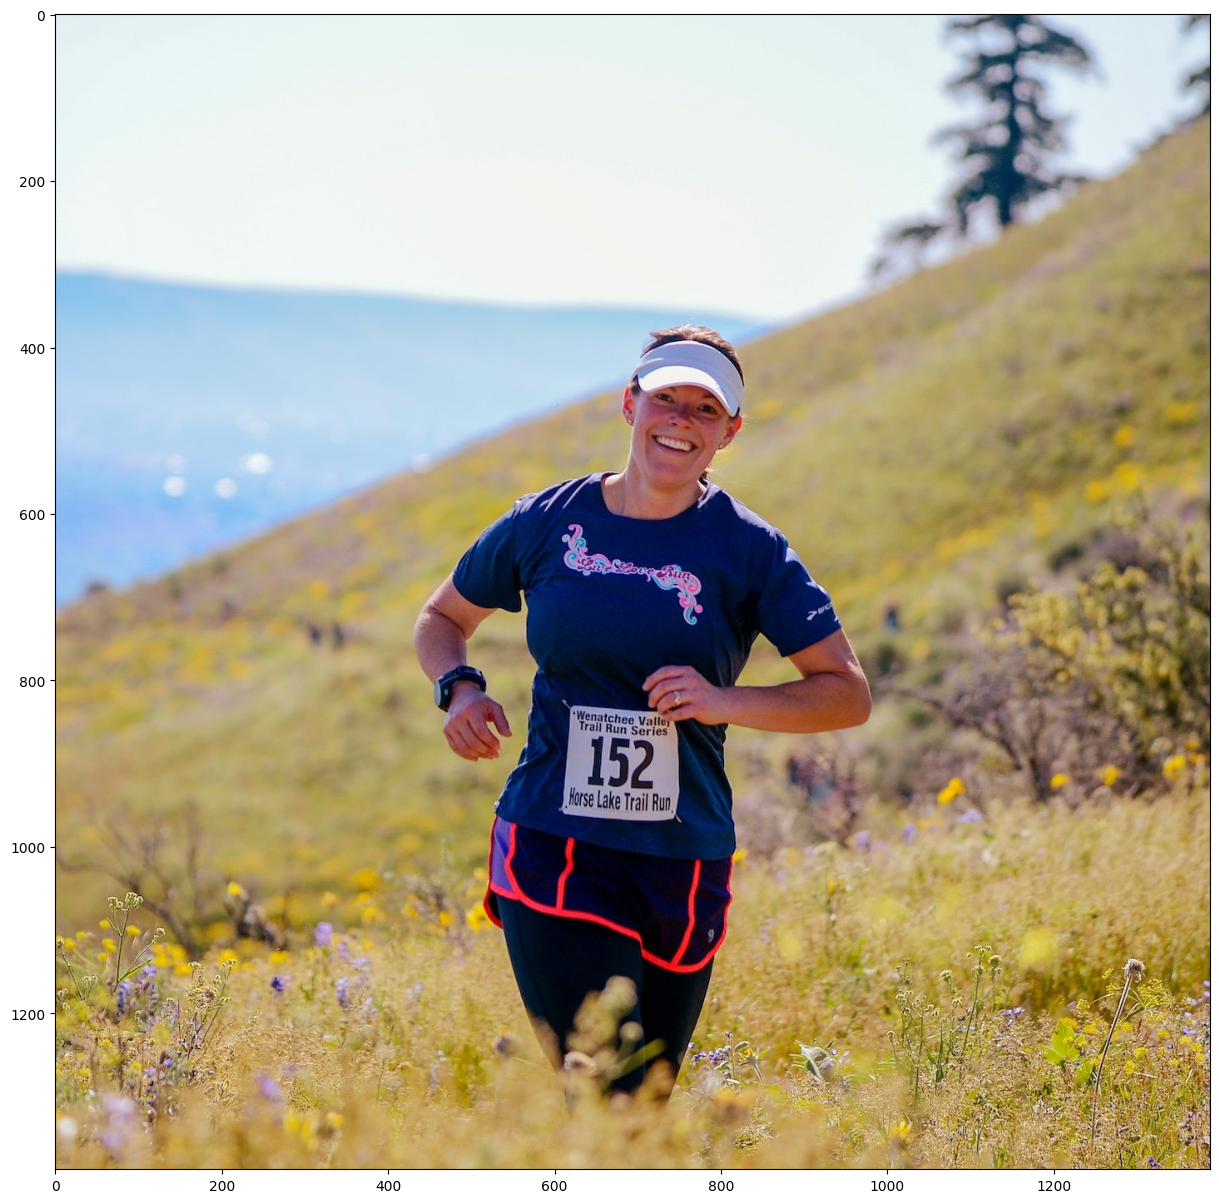

In [31]:
# Bouding Boxes within Image

# FigSize Standard
fig, ax = plt.subplots(figsize=(15, 15))

# Image Recreation
ax.imshow(image)
# Setting Patches

# 1st Setting Patch
rect = patches.Rectangle(tuple(example[0][:2]), example[0][2]-example[0][0], example[0][3]-example[0][1], linewidth=3, edgecolor='green', facecolor='None')
ax.add_patch(rect)
# 2nd Setting Patch
rect = patches.Rectangle(tuple(example[1][:2]), example[1][2]-example[1][0], example[1][3]-example[1][1], linewidth=3, edgecolor='red', facecolor='none')
ax.add_patch(rect)

plt.show()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=443b5ba7-a809-4db3-8c68-be90dbb10246' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>